Dataset Loaded Successfully!

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5    Male   31                  17                      40

Shape: (10, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+

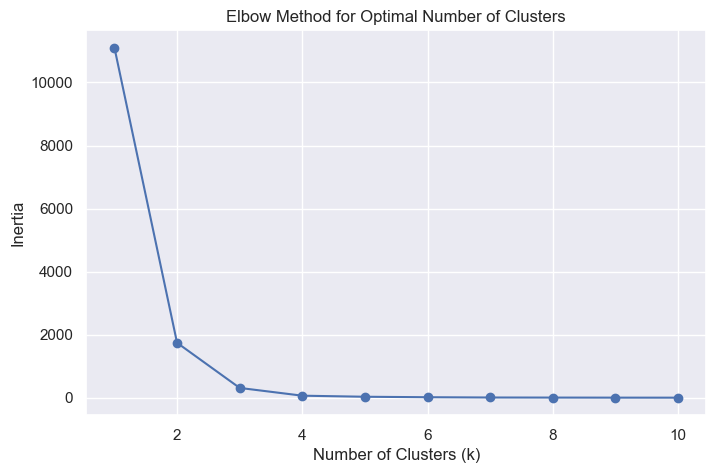


Cluster Labels Added:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        2  
1        0  
2        1  
3        0  
4        2  


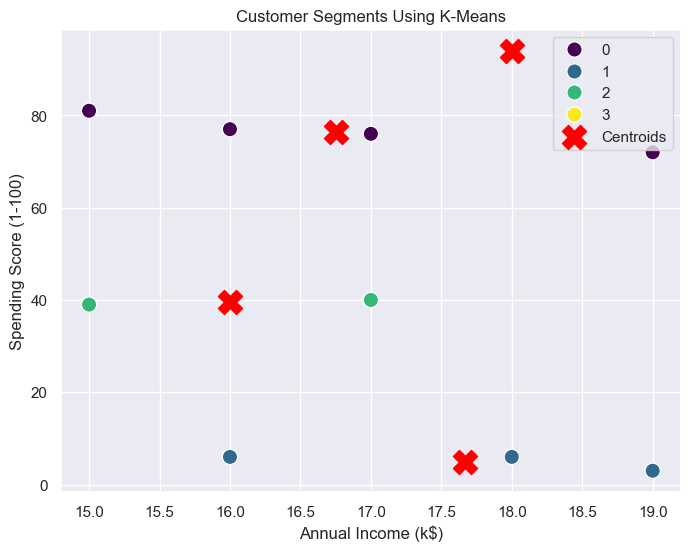


Cluster Centers:
Cluster 0: Income=16.75, Spending Score=76.50
Cluster 1: Income=17.67, Spending Score=5.00
Cluster 2: Income=16.00, Spending Score=39.50
Cluster 3: Income=18.00, Spending Score=94.00

Interpretation of Segments:
Cluster 0 → Low Income, Moderate Spending
Cluster 1 → High Income, High Spending (Premium Customers)
Cluster 2 → Low Income, Low Spending
Cluster 3 → High Income, Low Spending


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_theme()
df = pd.read_csv("mall_customers.csv")   # Correct path (same folder)

print("Dataset Loaded Successfully!\n")
print(df.head())

print("\nShape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia_vals = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia_vals.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_vals, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("\nCluster Labels Added:")
print(df.head())
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    s=120,
    palette="viridis"
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color='red',
    s=300,
    marker='X',
    label='Centroids'
)

plt.title("Customer Segments Using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

print("\nCluster Centers:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: Income={center[0]:.2f}, Spending Score={center[1]:.2f}")

print("\nInterpretation of Segments:")
print("Cluster 0 → Low Income, Moderate Spending")
print("Cluster 1 → High Income, High Spending (Premium Customers)")
print("Cluster 2 → Low Income, Low Spending")
print("Cluster 3 → High Income, Low Spending")
